<a href="https://colab.research.google.com/github/Dhiten/ProyectoIntegrador/blob/main/ProyectoIntegrador2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definición de librerias

In [ ]:
from google.colab import drive
import numpy as np
import difflib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate,KFold,StratifiedKFold
import seaborn as sns
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor,MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score,accuracy_score,plot_confusion_matrix,confusion_matrix,precision_score,f1_score, roc_curve, auc,multilabel_confusion_matrix,auc 



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/Shareddrives/Cálculo/DataSetDefFixed.csv",encoding='latin-1')
df['FECHA']=pd.to_datetime(df['FECHA']).dt.weekday
df['COMPARENDO']=pd.to_numeric(df['COMPARENDO'])
df.head()

,Unnamed: 0,COMPARENDO,FECHA,CÓDIGO INFRACCIÓN,INFRACCION,LUGAR,CLASE VEHICULO,VALOR
0,0,9.220000e+18,6,B02,Conducir un vehículo con la licencia de conduc...,VIA SARDINATA-CUCUTA,AUTOMOVIL,"183,854"
1,2,9.220000e+18,4,B02,Conducir un vehículo con la licencia de conduc...,VIA OCAÑA-SARDINATA,AUTOMOVIL,"183,855"
2,3,9.220000e+18,1,B02,Conducir un vehículo con la licencia de conduc...,VIA PAMPLONA-BUCARAMANGA,CAMIONETA,"183,855"
3,4,9.220000e+18,4,B02,Conducir un vehículo con la licencia de conduc...,VIA PAMPLONA-BUCARAMANGA,CAMIONETA,"183,855"
4,5,9.220000e+18,6,B01,Conducir un vehículo sin llevar consigo la lic...,VIA SARDINATA-CUCUTA,MOTOCICLETA,"183,854"


#Comparendos por lugar

Text(0, 0.5, 'Cantidad infracciones')

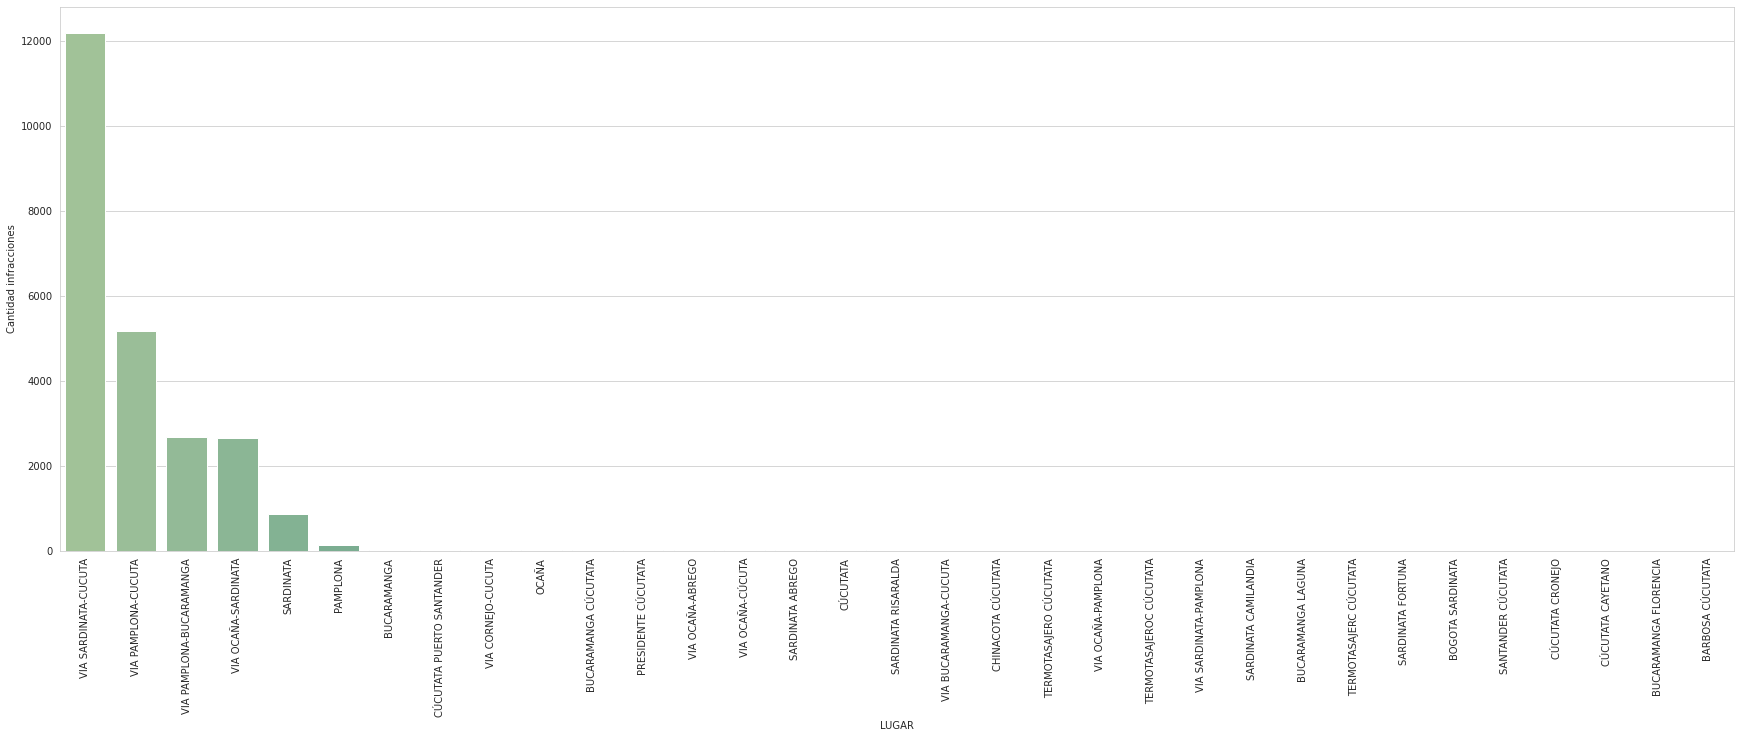

In [ ]:
data = df.groupby('LUGAR').count().sort_values(by='INFRACCION', ascending=False)
_, ax = plt.subplots(figsize=(30,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.barplot(y = data['INFRACCION'], x = data.index, ci=None, palette="crest",ax=ax);#lugar vs infraccion
ax.set_ylabel("Cantidad infracciones")

#Comparendos por vehiculo

Text(0, 0.5, 'Frecuencia')

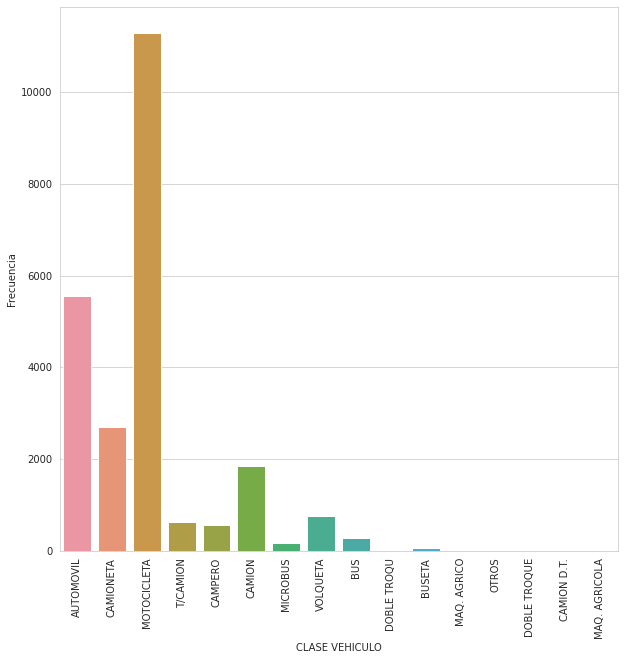

In [ ]:
sns.set_style('whitegrid')
_, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.countplot(x = "CLASE VEHICULO", data = df,ax=ax);
ax.set_ylabel("Frecuencia")

#Infracciones más cometidas


Text(0, 0.5, 'Frecuencia')

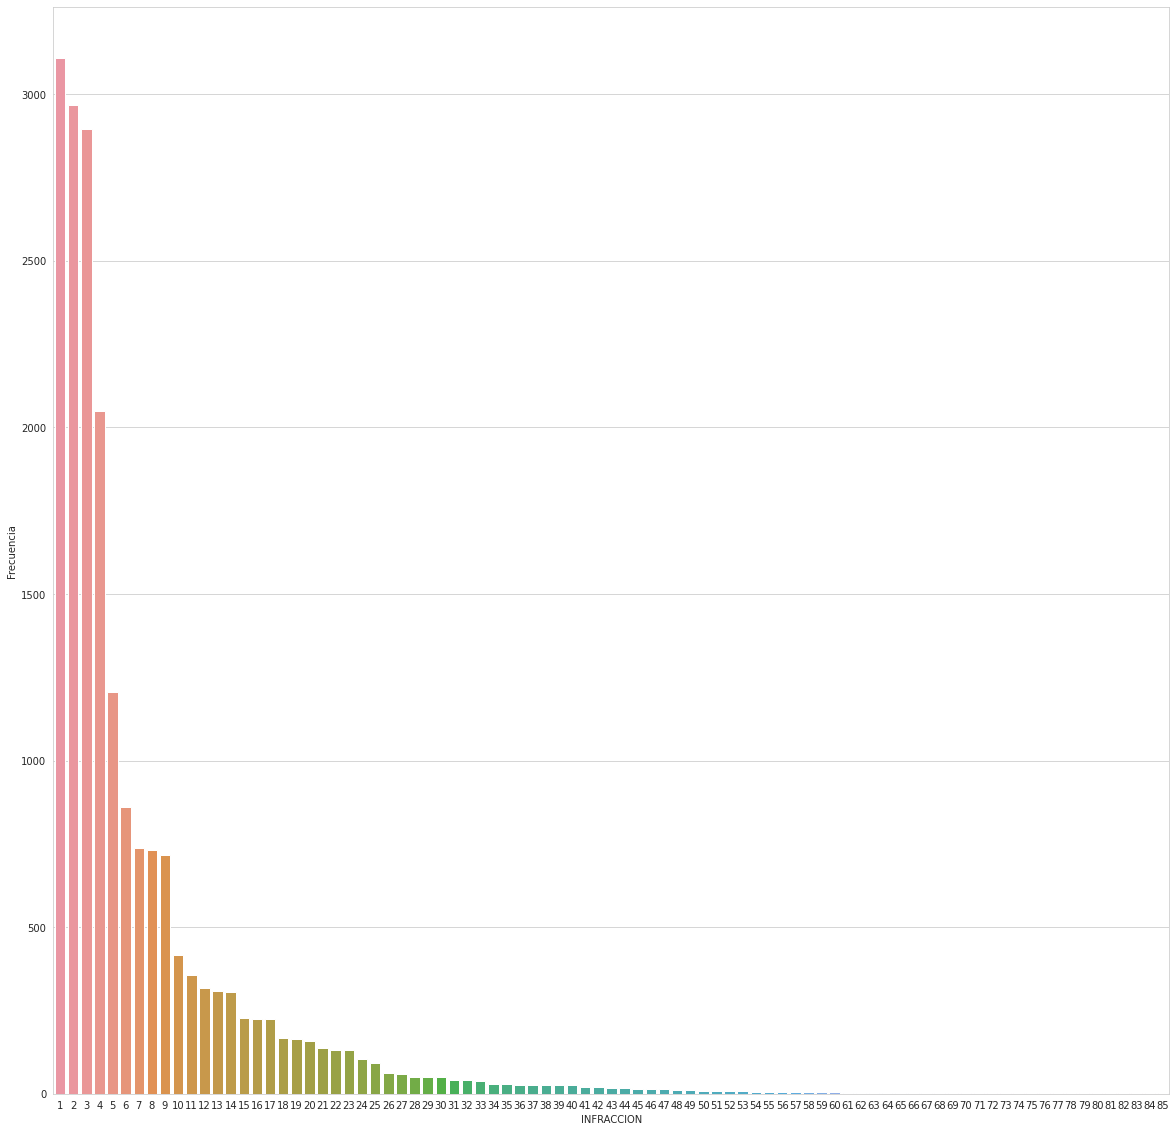

In [ ]:
dftemp= df[(df['CLASE VEHICULO']=='MOTOCICLETA')| (df['CLASE VEHICULO']=='AUTOMOVIL')|(df['CLASE VEHICULO']=='CAMIONETA')]
sns.set_style('whitegrid')
_, ax = plt.subplots(figsize=(20,20))
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
g = sns.countplot(x = "INFRACCION", data = dftemp,ax=ax,order = dftemp['INFRACCION'].value_counts().index);
g.set_xticks(range(len(dftemp['INFRACCION'].unique())))
g.set_xticklabels([str(i+1) for i in range(len(dftemp['INFRACCION'].unique()))])
ax.set_ylabel("Frecuencia")

In [ ]:
pp = pd.DataFrame(np.column_stack((dftemp['INFRACCION'].value_counts().index,[str(i+1) for i in range(len(dftemp['INFRACCION'].unique()))])),columns=['INFRACCIÓN','INDEX'])
pp.to_excel('/content/drive/Shareddrives/Cálculo/InfracciónIndice.xlsx')

#Infracciones en moto

In [ ]:
dftemp =df.loc[df['CLASE VEHICULO']=='MOTOCICLETA']
sns.set_style('whitegrid')
_, ax = plt.subplots(figsize=(10,2.5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.countplot(x = "INFRACCION", data = dftemp,ax=ax, palette="crest",order = dftemp['INFRACCION'].value_counts().index)
ax.set_ylabel("Cantidad de infracciones")

#Infracciones en automovil

In [ ]:
dftemp =(df.loc[df['CLASE VEHICULO']=='AUTOMOVIL'])
sns.set_style('whitegrid')
_, ax = plt.subplots(figsize=(10,2.5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.countplot(x = "INFRACCION", data = dftemp,ax=ax, palette="crest", order = dftemp['INFRACCION'].value_counts().index)
ax.set_ylabel("Cantidad de infracciones")

#Infracciones en camioneta

In [ ]:
dftemp=(df.loc[df['CLASE VEHICULO']=='CAMIONETA'])
sns.set_style('whitegrid')
_, ax = plt.subplots(figsize=(10,2.5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.countplot(x = "INFRACCION", data = dftemp,ax=ax, palette="crest",order = dftemp['INFRACCION'].value_counts().index)
ax.set_ylabel("Cantidad de infracciones")

#Definición de sets y df a utilizar


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df= df.loc[(df['LUGAR'] == "VIA SARDINATA-CUCUTA") | 
           (df['LUGAR'] == "VIA PAMPLONA-CUCUTA") |
           (df['LUGAR'] == "VIA PAMPLONA-BUCARAMANGA")]
#(df['INFRACCION']=='Conducir un vehículo sin llevar consigo la licencia de conducción') porque ya no es un comparendo
#0='No realizar la revisión técnico-mecánica en el plazo legal establecido o cuando el vehículo no se encuentre en adecuadas condiciones técnico-mecánicas o de emisiones contaminantes, aun cuando porte los certificados correspondientes, además el vehículo será inmovilizado'
#1='Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que este sea retirado por una persona autorizada por el infractor con licencia de conducción'
df = df.loc[(df['INFRACCION']=='No realizar la revisión técnico-mecánica en el plazo legal establecido o cuando el vehículo no se encuentre en adecuadas condiciones técnico-mecánicas o de emisiones contaminantes, aun cuando porte los certificados correspondientes, además el vehículo será inmovilizado')
            |(df['INFRACCION']=='Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que este sea retirado por una persona autorizada por el infractor con licencia de conducción')]

df=df.loc[(df['CLASE VEHICULO']=='AUTOMOVIL')|(df['CLASE VEHICULO']=='CAMIONETA')|(df['CLASE VEHICULO']=='MOTOCICLETA')]

cols = ['CLASE VEHICULO','LUGAR','FECHA']
dfs = df[cols]
labelencoder_X = LabelEncoder()

dfs['FECHA'] = pd.to_numeric(df['FECHA'])
X = dfs.iloc[:,:].values
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
Y = df['INFRACCION'].values
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
x= pd.get_dummies(df[cols],drop_first=True)
y= df['INFRACCION'].values



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
print("x")
print(x)

x
       FECHA  CLASE VEHICULO_CAMIONETA  CLASE VEHICULO_MOTOCICLETA  \
36         3                         0                           1   
40         4                         0                           1   
41         5                         0                           0   
43         2                         0                           1   
49         6                         0                           1   
...      ...                       ...                         ...   
23841      3                         0                           1   
23843      5                         0                           1   
23846      6                         0                           1   
23861      4                         0                           1   
23863      4                         0                           1   

       LUGAR_VIA PAMPLONA-CUCUTA  LUGAR_VIA SARDINATA-CUCUTA  
36                             0                           1  
40                             

In [ ]:
print("Y")
print(Y)

Y
[0 1 1 ... 0 0 1]


In [ ]:
print(y)

['Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que este sea retirado por una persona autorizada por el infractor con licencia de conducción'
 'No realizar la revisión técnico-mecánica en el plazo legal establecido o cuando el vehículo no se encuentre en adecuadas condiciones técnico-mecánicas o de emisiones contaminantes, aun cuando porte los certificados correspondientes, además el vehículo será inmovilizado'
 'No realizar la revisión técnico-mecánica en el plazo legal establecido o cuando el vehículo no se encuentre en adecuadas condiciones técnico-mecánicas o de emisiones contaminantes, aun cuando porte los certificados correspondientes, además el vehículo será inmovilizado'
 ...
 'Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que este sea retirado por una persona autorizada 

#Modelo de regresión logistica

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=138)
log_mod = LogisticRegression().fit(X_train, y_train)

print(log_mod.score(X_val, y_val))


0.5699300699300699


**Probabilidad comparendo**: 'No realizar la revisión técnico-mecánica en el plazo legal establecido o cuando el vehículo no se encuentre en adecuadas condiciones técnico-mecánicas o de emisiones contaminantes, aun cuando porte los certificados correspondientes, además el vehículo será inmovilizado'

In [ ]:
np.sum(log_mod.predict(X)==0)/y.size

0.7097586568730325

**Probabilidad comparendo**: 'Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que este sea retirado por una persona autorizada por el infractor con licencia de conducción'

In [ ]:
np.sum(log_mod.predict(X)==1)/y.size


0.2902413431269675

**Accuracy**

In [ ]:
print(f"Accuracy of the classifier is: {accuracy_score(y_val,log_mod.predict(X_val))}")


Accuracy of the classifier is: 0.5699300699300699


**Cross validation**

In [ ]:
scores = cross_val_score(log_mod, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.57 accuracy with a standard deviation of 0.08


**Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
print(confusion_matrix(y_val, log_mod.predict(X_val)))
vp=confusion_matrix(y_val, log_mod.predict(X_val))[0][0]
fn=confusion_matrix(y_val, log_mod.predict(X_val))[1][0]
fp=confusion_matrix(y_val, log_mod.predict(X_val))[0][1]
vn=confusion_matrix(y_val, log_mod.predict(X_val))[1][1]


[[572 157]
 [458 243]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


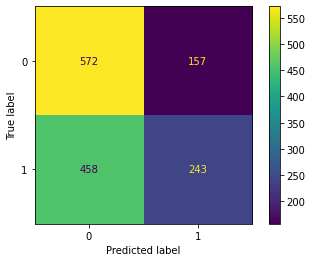

In [ ]:
plot_confusion_matrix(log_mod, X_val, y_val)

**Precision**

In [ ]:
print((vp+vn)/(vp+fp+fn+vn))

0.5699300699300699


**Sensibilidad**

In [ ]:
print(vp/(vp+fn))

0.5553398058252427


 **Especificidad**

In [ ]:
print(vn/(vn+fp))

0.6075


**Curva ROC**

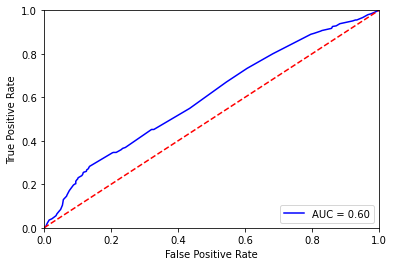

In [ ]:
predicts= log_mod.predict_proba(X_val)
predicts =predicts[:,1]
fpr,tpr,treshold= roc_curve(y_val,predicts)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#Mlp Classifier

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3,random_state=138)
mlp_clas = MLPClassifier(hidden_layer_sizes=(50,50,50,50), activation='logistic',solver= 'adam', max_iter=2000).fit(X_train, y_train)
print(mlp_clas.score(X_val,y_val))

0.5755244755244755


**Probabilidad comparendo**: 'No realizar la revisión técnico-mecánica en el plazo legal establecido o cuando el vehículo no se encuentre en adecuadas condiciones técnico-mecánicas o de emisiones contaminantes, aun cuando porte los certificados correspondientes, además el vehículo será inmovilizado'

In [ ]:
np.sum(mlp_clas.predict(X)==0)/y.size

0.8044071353620147

**Probabilidad comparendo**: 'Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que este sea retirado por una persona autorizada por el infractor con licencia de conducción'

In [ ]:
np.sum(mlp_clas.predict(X)==1)/y.size


0.1955928646379853

**Accuracy**

In [ ]:
print(f"Accuracy of the classifier is: {accuracy_score(y_val,mlp_clas.predict(X_val))}")


Accuracy of the classifier is: 0.5755244755244755


**Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
print(confusion_matrix(y_val, mlp_clas.predict(X_val)))
vp=confusion_matrix(y_val, mlp_clas.predict(X_val))[0][0]
fn=confusion_matrix(y_val, mlp_clas.predict(X_val))[1][0]
fp=confusion_matrix(y_val, mlp_clas.predict(X_val))[0][1]
vn=confusion_matrix(y_val, mlp_clas.predict(X_val))[1][1]

[[636  93]
 [514 187]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


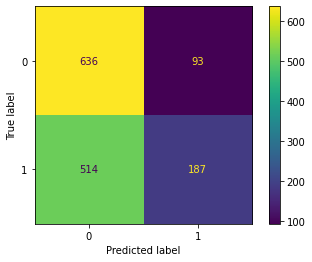

In [ ]:
plot_confusion_matrix(mlp_clas, X_val, y_val)
plt.show()

**Precision**

In [ ]:
print((vp+vn)/(vp+fp+fn+vn))

0.5755244755244755


**Sensibilidad**

In [ ]:
print(vp/(vp+fn))

0.5530434782608695


 **Especificidad**

In [ ]:
print(vn/(vn+fp))

0.6678571428571428


**Cross validation**

In [ ]:
scores = cross_val_score(mlp_clas, X, y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.55 accuracy with a standard deviation of 0.09


**Curva ROC**

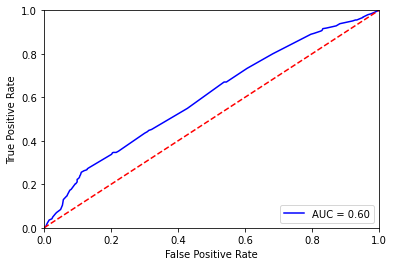

In [ ]:
predicts= mlp_clas.predict_proba(X_val)
predicts =predicts[:,1]
fpr,tpr,treshold= roc_curve(y_val,predicts)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
neigh = KNeighborsClassifier(n_neighbors=25) 
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3,random_state=138)
neigh.fit(X_train, y_train)

print(neigh.score(X_val,y_val))

0.5734265734265734


**K optimo**

Text(0, 0.5, 'Accuracy')

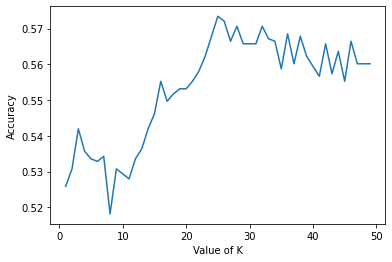

In [ ]:
range_k = range(1,50)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_val)
   scores[k] =accuracy_score(y_val,y_pred)
   scores_list.append(accuracy_score(y_val,y_pred))
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")


**Probabilidad comparendo**: 'No realizar la revisión técnico-mecánica en el plazo legal establecido o cuando el vehículo no se encuentre en adecuadas condiciones técnico-mecánicas o de emisiones contaminantes, aun cuando porte los certificados correspondientes, además el vehículo será inmovilizado'

In [ ]:
np.sum(neigh.predict(X)==0)/y.size

0.8100734522560336

**Probabilidad comparendo**: 'Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que este sea retirado por una persona autorizada por el infractor con licencia de conducción'

In [ ]:
np.sum(neigh.predict(X)==1)/y.size


0.18992654774396642

**Cross validation**

In [ ]:
scores = cross_val_score(neigh, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.54 accuracy with a standard deviation of 0.09


**Accuracy**

In [ ]:
print(f"Accuracy of the classifier is: {accuracy_score(y_val, neigh.predict(X_val))}")


Accuracy of the classifier is: 0.5734265734265734


**Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
print(confusion_matrix(y_val, neigh.predict(X_val)))
vp=confusion_matrix(y_val, neigh.predict(X_val))[0][0]
fn=confusion_matrix(y_val, neigh.predict(X_val))[1][0]
fp=confusion_matrix(y_val, neigh.predict(X_val))[0][1]
vn=confusion_matrix(y_val, neigh.predict(X_val))[1][1]


[[639  90]
 [520 181]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


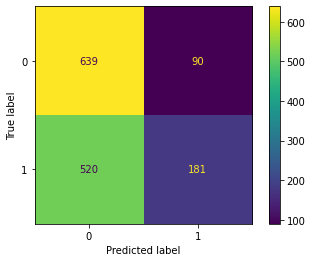

In [ ]:
plot_confusion_matrix(neigh, X_val, y_val)
plt.show()

**Precision**

In [ ]:
print((vp+vn)/(vp+fp+fn+vn))

0.5734265734265734


**Sensibilidad**

In [ ]:
print(vp/(vp+fn))

0.551337359792925


 **Especificidad**

In [ ]:
print(vn/(vn+fp))

0.6678966789667896


**Curva ROC**

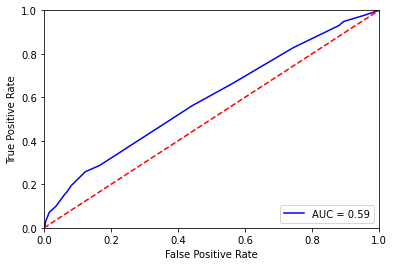

In [ ]:
predicts= neigh.predict_proba(X_val)
predicts =predicts[:,1]
fpr,tpr,treshold= roc_curve(y_val,predicts)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Graps

In [ ]:
predicts= log_mod.predict_proba(X_val)
predicts =predicts[:,1]
fpr,tpr,treshold= roc_curve(y_val,predicts)
roc_auc=auc(fpr,tpr)
predictsmlp= mlp_clas.predict_proba(X_val)
predictsmlp =predictsmlp[:,1]
fprmlp,tprmlp,tresholdmlp= roc_curve(y_val,predictsmlp)
roc_aucmlp=auc(fprmlp,tprmlp)
predictskn= neigh.predict_proba(X_val)
predictskn =predictskn[:,1]
fprkn,tprkn,tresholdkn= roc_curve(y_val,predictskn)
roc_auckn=auc(fprkn,tprkn)
plt.plot(fpr, tpr, label = 'AUC Logistic Regresion = %0.2f ' % roc_auc)
plt.plot(fprmlp, tprmlp,  label = 'AUC MLP Classifier = %0.2f' % roc_aucmlp,color='g')
plt.plot(fprkn, tprkn,  label = 'AUC KNeighbors Classifier = %0.2f ' % roc_auckn, color='black')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#Area under the ROC Curve.=AUC